In [2]:
from qiskit import *
from qiskit.circuit.library import QFT
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy as cp
mpl.rcParams.update(mpl.rcParamsDefault)

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, \
Estimator, Session, Options

service = QiskitRuntimeService(channel='ibm_quantum')
IBMQ.save_account("3a96a81d0c023c892178af8b27b75cefd4e37cc77cba3220d645e34a78b3dc6c7d7d7b9db9a77f342095fea3baf64791aa58deccd8e4e07bfcc6310da89873f5", overwrite=True)
IBMQ.load_account()

/tmp/ipykernel_167/824086492.py:14: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account("3a96a81d0c023c892178af8b27b75cefd4e37cc77cba3220d645e34a78b3dc6c7d7d7b9db9a77f342095fea3baf64791aa58deccd8e4e07bfcc6310da89873f5", overwrite=True)
/tmp/ipykernel_167/824086492.py:14: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account("3a96a81d0c023c892178af

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
provider = IBMQ.get_provider("ibm-q")
#provider.backends()

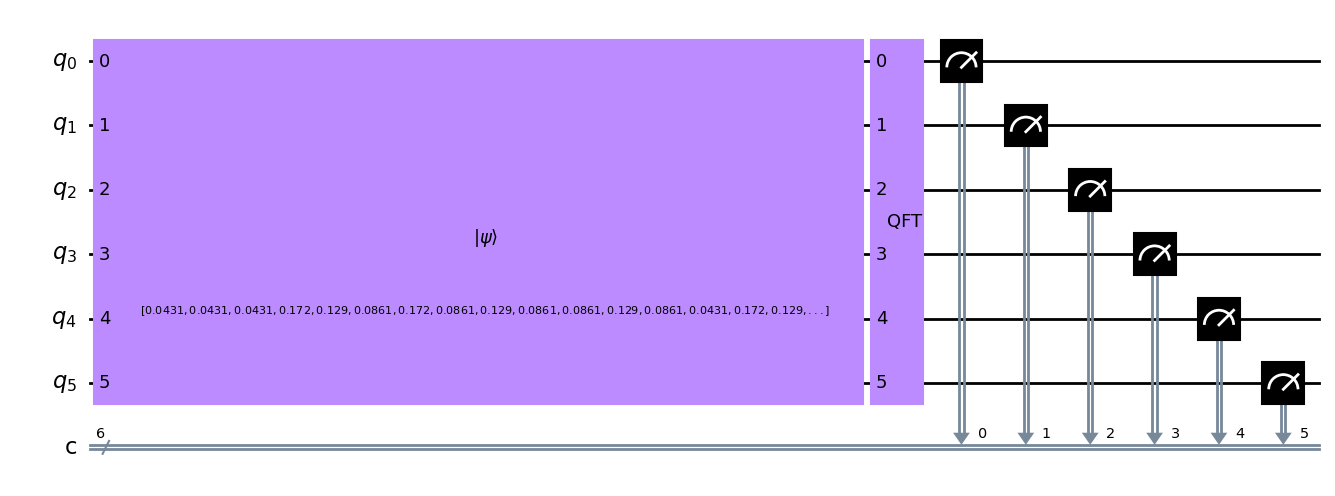

In [4]:
sequence = "AAATGCTCGCCGCATGCTCTGATGTAGTAGTCCCATGCTTTTGCTATGCTATGCTACAGTACTG"

conversion = {"A": 1, "C": 2, "G": 3, "T": 4}

numeric_sequence = [conversion[i] for i in sequence]
alpha = numeric_sequence

alpha = alpha/np.linalg.norm(alpha)
q = QuantumRegister(6,'q') 
c = ClassicalRegister(6,'c') 
qc = QuantumCircuit(q,c)
qc.initialize(alpha)
qft = QFT(num_qubits=6, do_swaps=True).to_gate()
qc.append(qft, qargs=[0, 1, 2, 3, 4, 5])
qc.measure(range(6), range(6))
#qc.draw('mpl').savefig('/home/jovyan/My_Notebooks/Images/qTest_2_0.png')
qc.draw('mpl')

In [5]:
machine = provider.get_backend('ibm_lagos')

In [2]:
import qiskit.tools.jupyter
%qiskit_job_watcher
job = execute(qc, machine, shots=64)

Traceback (most recent call last):
  Cell In[2], line 1
    job = execute(qc, machine, shots=64)
NameError: name 'execute' is not defined

Use %tb to get the full traceback.


In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [1]:
result = job.result()
print(result.get_counts(qc))

Traceback (most recent call last):
  Cell In[1], line 1
    result = job.result()
NameError: name 'job' is not defined

Use %tb to get the full traceback.


In [ ]:
plot_histogram(result.get_counts(qc), color="darkgreen", title=r"", figsize=(9.2, 4.8))